# Preprocesamiento

Antes de comenzar, cargamos todas las librerías que vamos a utilizar a lo largo del notebook.

In [489]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score, cross_val_predict, train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

from sklearn import metrics
from sklearn.metrics import confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from collections import Counter
random.seed(43)
np.random.seed(43)


## 1. Lectura de datos

El dataset que vamos a utilizar se encuentra disponible en el siguiente enlace: https://data.mendeley.com/datasets/zsjhvy9ytx/1.  
Cargamos el dataset en un dataframe de pandas:

In [490]:
data = pd.read_excel("data/datos.xlsx" )
data.head()

,Patient nuber,Materna age [years],Pre-pregnancy weight [kg],Maternal hight [m],BMI [kg/m²],Art ut. D-resistance index [RI],Art ut. D-pulsatility index [PI],Art ut. D-Peak Systolic Velocity [PSV],Art ut. L-resistance index [RI],Art ut. L-pulsatility index [PI],Art ut. L-Peak Systolic Velocity [PSV],Mean RI,Mean PI,Mean PSV,Bilateral notch,Gestational age at delivery [weeks],Parity,Birth weight [g],S-Flt1 [µg/L],S-PLGF [µg/L],sFLT/PLGF,Class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,0.460,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,0.535,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,0.470,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,0.620,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,0.605,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


Vamos a renombrar las columnas para que sea más sencillo acceder a ellas.

In [491]:
data.columns=["ID","age", "weight", "height", "BMI", "R-RI", "R-PI", "R-PSV", "L-RI", "L-PI", "L-PSV", "meanRI", "meanPI", "meanPSV", "bilateralNotch", "age_delivery", "parity", "birth_weight", "S-Flt1", "S-PLGF", "sFLT/PLGF", "class"] 
data.head()

,ID,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,age_delivery,parity,birth_weight,S-Flt1,S-PLGF,sFLT/PLGF,class
0,2 DM,37,58.0,1.70,20.069204,0.43,0.56,65.3,0.49,0.60,53.9,0.460,0.580,59.6,0,37.285714,1,3060,11511,102.8,111.974708,Control
1,650387,35,46.0,1.64,17.102915,0.40,0.54,62.5,0.67,0.73,72.9,0.535,0.635,67.7,0,36.714286,3,2780,3146,752.8,4.179065,Control
2,650394,34,64.0,1.75,20.897959,0.41,0.60,59.7,0.53,0.62,62.3,0.470,0.610,61.0,0,35.142857,1,2450,3858,203.2,18.986220,Control
3,678474,31,49.0,1.52,21.208449,0.65,0.97,61.5,0.59,0.99,68.1,0.620,0.980,64.8,0,36.428571,2,2490,995,1051.0,0.946717,Control
4,653633,31,66.0,1.60,25.781250,0.62,0.88,58.1,0.59,0.76,59.1,0.605,0.820,58.6,0,32.142857,1,1905,1667,1440.0,1.157639,Control


Algunas de las columnas del dataframe no son de interés para este problema de clasificación. Estas columnas son:  
* **ID**: se trata de un número identificador de paciente que no aporta ningún tipo de interés.
* **Age_delivery**: representa la edad gestacional, es decir, el número de semanas de la embarazada en el momento de dar a luz. Esta información no aporta información ya que la finalidad del modelo es detectar riesgos durante el embarazo.
* **Birth_weight**: peso del bebe al nacer. Igual que el campo *age_delivery*, no aporta información para predecir un riesgo durante el embarazo.

Por ello, se van a eliminar dichas columnas del dataset.

In [492]:
data.drop(['ID', 'age_delivery', 'birth_weight'], axis=1, inplace=True)

In [493]:
data.columns

Index(['age', 'weight', 'height', 'BMI', 'R-RI', 'R-PI', 'R-PSV', 'L-RI',
       'L-PI', 'L-PSV', 'meanRI', 'meanPI', 'meanPSV', 'bilateralNotch',
       'parity', 'S-Flt1', 'S-PLGF', 'sFLT/PLGF', 'class'],
      dtype='object')

## 2. Valores ausentes

Comenzaremos calculando el número de valores ausentes en cada columna

In [494]:
data.isnull().sum()

age               0
weight            1
height            1
BMI               3
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           2
bilateralNotch    0
parity            0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

En total, tenemos 7 valores ausentes repartidos entre 5 columnas distintas. Antes de optar por despreciar dichas columnas, vamos a estudiar cómo podríamos rellenar esos huecos. Como tenemos pocos valores nulos, vamos a crear un dataframe que contengan todas las filas con valores ausentes. 

In [495]:
nulos = data[data.isnull().any(1)]
print('Tenemos {} filas con valores nulos'.format(nulos.shape[0]))
nulos

Tenemos 5 filas con valores nulos


,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,parity,S-Flt1,S-PLGF,sFLT/PLGF,class
58,43,66.0,1.52,NaN,0.63,0.60,67.4,0.59,0.67,62.9,0.610,0.635,65.15,0,1,27390,153.60,178.320312,IUGR_PE
59,36,52.0,1.64,NaN,0.67,0.81,57.9,0.69,0.89,61.4,0.680,0.850,59.65,1,1,29805,79.73,373.824157,IUGR_PE
61,26,NaN,NaN,NaN,0.84,2.02,68.8,0.83,2.28,59.4,0.835,2.150,64.10,1,1,10015,42.64,234.873358,IUGR
93,30,53.0,1.57,21.501886,0.49,0.52,60.4,0.51,0.56,58.1,0.500,0.540,NaN,0,1,10535,34.97,301.258221,PE
94,26,74.0,1.65,27.180900,0.69,0.62,54.9,0.73,0.71,60.5,0.710,0.665,NaN,2,1,12154,15.84,767.297980,PE


En las filas **58** y **59** falta el valor de la columna BMI. El BMI representa el índice de masa corporal (IMC), valor que se calcula dividiendo el peso entre la altura al cuadrado. Estos dos valores ausentes pueden ser calculados usando las columnas weight y height.  

$$IMC = peso \cdot altura^2$$ 

En la fila **61**, falta tanto el BMI como weight y height. Para las columnas weight y height, sustituiremos el valor nulo por el valor medio. En cuanto el valor ausente del BMI, lo calcularemos como en el primer caso calculando el IMC usando el valor de weight y height correspondiente.  

Por último, en la fila **93** y **94** falta el valor de meanPSV. Esta columna contiene la media de las columnas R-PSV y L-PSV. Calcularemos la media para rellenar este valor ausente.

In [496]:
#cálculo peso medio
mean_weight = data["weight"].mean()
data["weight"]= data["weight"].fillna(mean_weight)

In [497]:
#Cálculo de altura media
mean_height = data["height"].mean()
data["height"]= data["height"].fillna(mean_height)

In [498]:
#cálculo de IMC
data["BMI"]= data["BMI"].fillna(data["weight"]/(data["height"]*data["height"]))

In [499]:
whb = pd.DataFrame([data.loc[58], data.loc[59],data.loc[61]])
whb[["weight", "height", "BMI"]]

,weight,height,BMI
58,66.000000,1.520000,28.566482
59,52.000000,1.640000,19.333730
61,67.531915,1.655638,24.636450


In [500]:
#Cálculo de media entre r-psv y l-psv
data["meanPSV"]= data["meanPSV"].fillna((data["R-PSV"]+data["L-PSV"])/2)

In [501]:
psv = pd.DataFrame([data.loc[93], data.loc[94]])
psv[["R-PSV", "L-PSV", "meanPSV"]]

,R-PSV,L-PSV,meanPSV
93,60.4,58.1,59.25
94,54.9,60.5,57.70


In [502]:
data.isnull().sum()

age               0
weight            0
height            0
BMI               0
R-RI              0
R-PI              0
R-PSV             0
L-RI              0
L-PI              0
L-PSV             0
meanRI            0
meanPI            0
meanPSV           0
bilateralNotch    0
parity            0
S-Flt1            0
S-PLGF            0
sFLT/PLGF         0
class             0
dtype: int64

In [503]:
print("Hay {} valores nulos en el dataframe".format(data.isnull().sum().sum()))

Hay 0 valores nulos en el dataframe


## 3. Normalización

El dataset presenta distintos rangos entre sus atributos (por ejemplo, la columna L-RI tiene un valor medio de **0,655895**, mientras que el valor medio de S-Plt1 es **13156,2**)

In [504]:
data.describe()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,parity,S-Flt1,S-PLGF,sFLT/PLGF
count,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000,95.00000,95.000000,95.000000,95.000000,95.000000,95.000000,95.000000
mean,32.147368,67.531915,1.655638,24.603079,0.639474,1.063158,60.809053,0.655895,1.102842,61.128000,0.647684,1.08300,60.968526,0.600000,1.536842,13156.200000,302.825789,243.129174
std,5.084328,14.278165,0.062221,4.772114,0.126444,0.501891,6.709441,0.108437,0.470865,6.076082,0.112455,0.47324,5.657344,0.674773,0.920344,13824.935398,383.390465,351.790952
min,21.000000,46.000000,1.500000,17.102915,0.400000,0.450000,47.800000,0.430000,0.520000,46.800000,0.420000,0.54000,50.200000,0.000000,1.000000,995.000000,10.050000,0.946717
25%,29.000000,58.000000,1.620000,21.380195,0.560000,0.645000,56.700000,0.590000,0.695000,57.800000,0.570000,0.67000,57.625000,0.000000,1.000000,3623.500000,54.020000,7.367625
50%,32.000000,65.000000,1.660000,23.529412,0.670000,0.870000,59.100000,0.670000,0.890000,60.200000,0.670000,0.93500,60.050000,0.000000,1.000000,9530.000000,105.900000,119.728305
75%,36.000000,74.000000,1.700000,26.260131,0.735000,1.485000,63.250000,0.755000,1.530000,64.100000,0.750000,1.46750,62.425000,1.000000,2.000000,17947.000000,448.550000,362.884861
max,47.000000,113.000000,1.800000,39.682540,0.840000,2.490000,89.800000,0.830000,2.280000,89.800000,0.835000,2.21500,88.650000,2.000000,6.000000,74283.000000,1607.000000,2297.421203


Por eso, vamos a normalizar los valores numéricos del dataset. La estrategia elegida ha sido la normalización min-max. Esto consiste en que a cada valor le resta el valor mínimo y lo divide por la diferencia entre el máximo y el mínimo (produce valores entre 0 y 1)

In [505]:
num_var = [var for var in data.columns if data[var].dtype != 'object']

In [506]:
scaler =MinMaxScaler()
data[num_var]=scaler.fit_transform(data[num_var])

In [507]:
data.head()

,age,weight,height,BMI,R-RI,R-PI,R-PSV,L-RI,L-PI,L-PSV,meanRI,meanPI,meanPSV,bilateralNotch,parity,S-Flt1,S-PLGF,sFLT/PLGF,class
0,0.615385,0.179104,0.666667,0.131370,0.068182,0.053922,0.416667,0.15,0.045455,0.165116,0.096386,0.023881,0.244473,0.0,0.0,0.143489,0.058079,0.048347,Control
1,0.538462,0.000000,0.466667,0.000000,0.000000,0.044118,0.350000,0.60,0.119318,0.606977,0.277108,0.056716,0.455137,0.0,0.4,0.029350,0.465105,0.001408,Control
2,0.500000,0.268657,0.833333,0.168074,0.022727,0.073529,0.283333,0.25,0.056818,0.360465,0.120482,0.041791,0.280884,0.0,0.0,0.039065,0.120949,0.007855,Control
3,0.384615,0.044776,0.066667,0.181825,0.568182,0.254902,0.326190,0.40,0.267045,0.495349,0.481928,0.262687,0.379714,0.0,0.2,0.000000,0.651836,0.000000,Control
4,0.384615,0.298507,0.333333,0.384344,0.500000,0.210784,0.245238,0.40,0.136364,0.286047,0.445783,0.167164,0.218466,0.0,0.0,0.009169,0.895426,0.000092,Control


## 4. División de dataset

Sacamos clase:

In [508]:
X= data.drop('class', axis=1)
y= data['class']

Dividimos el dataset en train/test:

In [695]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

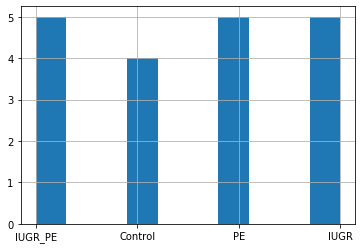

In [696]:
y_test.hist()

## 5. Balanceo del dataset 

Comenzamos con la técnica SMOTE estándar.

In [697]:
sm = SMOTE()
X_sm, y_sm = sm.fit_resample(X_train, y_train)

In [698]:
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_sm))

Original dataset shape Counter({'IUGR_PE': 27, 'Control': 25, 'PE': 17, 'IUGR': 7})
Resampled dataset shape Counter({'IUGR_PE': 27, 'Control': 27, 'PE': 27, 'IUGR': 27})


Continuamos con BorderlineSMOTE, variante de SMOTE

In [699]:
bsm = BorderlineSMOTE()
X_bsm, y_bsm = bsm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_bsm))

Original dataset shape Counter({'IUGR_PE': 27, 'Control': 25, 'PE': 17, 'IUGR': 7})
Resampled dataset shape Counter({'IUGR_PE': 27, 'Control': 27, 'PE': 27, 'IUGR': 27})


SVMSMOTE

In [700]:
svsm = SVMSMOTE()
X_svsm, y_svsm = svsm.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_svsm))

Original dataset shape Counter({'IUGR_PE': 27, 'Control': 25, 'PE': 17, 'IUGR': 7})
Resampled dataset shape Counter({'IUGR_PE': 27, 'Control': 27, 'PE': 21, 'IUGR': 16})


ADASYN

In [701]:
ada = ADASYN(sampling_strategy='minority')
X_ada, y_ada = ada.fit_resample(X_train, y_train)
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_ada))

Original dataset shape Counter({'IUGR_PE': 27, 'Control': 25, 'PE': 17, 'IUGR': 7})
Resampled dataset shape Counter({'IUGR': 28, 'IUGR_PE': 27, 'Control': 25, 'PE': 17})


In [702]:
train_data =[[X_sm, y_sm],[X_bsm,y_bsm],[X_svsm, y_svsm],[X_ada, y_ada]]

----

# Modelo predictivo (Clasificación)

## 1. Entrenamiento del modelo

Contamos con un dataset con pocas instancias, por lo que vamos a optar por utilizar todo el dataset para hacer la evaluación del modelo, es decir, vamos a utilizar la técnica de *cross validation* --> **CAMBIARRRRR**

Métricas que vamos a utilizar **EXPLICAR MEJOR**:
* **Matriz de confusión**: La matriz de confusión muestra el número de veces que se han producido los distintos tipos de aciertos y fallos. Tenemos TP, TN, FP y FN.
* **Precision**: Es el número de elementos identificados correctamente como positivo de un total de elementos identificados como positivos (TP/(TP+FP)) 
* **Recall** (cobertura): (TP/(TP+FN))
* **F1-score**: media armónica de precisión y cobertura

In [703]:
dt=["smote","bordSmote","SVMSmote","Adasyn"]

In [704]:
RESULTADOS= pd.DataFrame(columns=['Parametros','modelo','Recall'])

In [705]:
def evalua_modelos(parametros,clasificador, nombre_modelo, train_data, nombre_train_data, res_df):
    grid= GridSearchCV(clasificador, parametros, scoring= "accuracy")
    for i in range(len(nombre_train_data)):
        grid.fit(train_data[i][0], train_data[i][1])
        res_df.loc[nombre_modelo+" - "+ nombre_train_data[i]]= (grid.best_params_,grid.best_estimator_,grid.best_score_)

### KNeighbotsClassifier

In [706]:
parametros= {"n_neighbors":[1,2,3,4,5,6,7,8,9,10], "weights":['uniform', 'distance'], 
"algorithm": ['auto', 'ball_tree', 'kd_tree', 'brute'] }

In [707]:
evalua_modelos(parametros,KNeighborsClassifier(),"KNeighborsClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000


### DecisionTreeClassifier

In [708]:
parametros= {"criterion":["gini", 'entropy'],"splitter":['best', 'random'],"random_state":[43] }

In [709]:
evalua_modelos(parametros,DecisionTreeClassifier(),"DecisionTreeClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579


El mejor valor de Recall del algoritmo de DecisionTreeClassifier se consigue usando los datos de Borderline Smote, y con los siguientes parámetros: {'criterion': 'gini', 'splitter': 'best'}

### RandomForestClassifier

In [710]:
parametros= {"criterion":["gini", 'entropy'], "max_features":['auto', 'sqrt', 'log2'], "random_state":[43] }

evalua_modelos(parametros,RandomForestClassifier(),"RandomForestClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### Logistic Regresion (for multiclass)

In [711]:
parametros= {"multi_class":["multinomial"],"max_iter":[100,300, 500], "solver":['newton-cg', 'sag', 'saga', 'lbfgs'], "penalty":['l2', 'none'],"random_state":[43] }

evalua_modelos(parametros,LogisticRegression(),"LogisticRegression (multiclass)", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### Linear Support Vector Classification

In [712]:
parametros= {"loss":["hinge", "squared_hinge"],"C": [0.001,0.01,0.1,1,10,100,1000], "multi_class":['ovr', 'crammer_singer'], "max_iter":[1000, 3000], "random_state":[43] }

evalua_modelos(parametros,LinearSVC(),"LinearSVC", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### GradientBoostingClassifier

In [713]:
parametros= {"learning_rate":[0.1, 0.2,0.5, 0.8, 1.0], "n_estimators":[100,200,300],"max_depth":[3,4,5], "random_state":[43]}

evalua_modelos(parametros,GradientBoostingClassifier(),"GradientBoostingClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### Extra trees


In [714]:
parametros= {"criterion":['gini', 'entropy'], "n_estimators":[100,200,300], "random_state":[43]}

evalua_modelos(parametros,ExtraTreesClassifier(),"ExtraTreesClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### Adaboost Classifier

In [738]:
parametros= {"algorithm":['SAMME', 'SAMME.R'],"learning_rate":[0.1, 0.5, 1.0], "n_estimators":[50,100,150], "random_state":[43]}

evalua_modelos(parametros,AdaBoostClassifier(),"AdaBoostClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### MLPClassifier

In [745]:
parametros= {"activation": ['logistic', 'identity', 'tanh', 'relu'],"solver": ['adam', 'lbfgs','sgd'],
             "learning_rate":['constant', 'invscaling','adaptive'], "random_state":[43]}

evalua_modelos(parametros,MLPClassifier(),"MLPClassifier", train_data, dt, RESULTADOS)
RESULTADOS

,Parametros,modelo,Recall
KNeighborsClassifier - smote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.723377
KNeighborsClassifier - bordSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.731169
KNeighborsClassifier - SVMSmote,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.660234
KNeighborsClassifier - Adasyn,"{'algorithm': 'auto', 'n_n...",KNeighborsClassifier(n_nei...,0.670000
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
DecisionTreeClassifier - bordSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.732468
DecisionTreeClassifier - SVMSmote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.683041
DecisionTreeClassifier - Adasyn,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.731579
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403


### Selección de 15 mejores modelos

In [754]:
best_models = RESULTADOS.sort_values("Recall", ascending=False).head(15)
best_models

,Parametros,modelo,Recall
ExtraTreesClassifier - smote,"{'criterion': 'gini', 'n_e...",(ExtraTreeClassifier(rando...,0.834632
MLPClassifier - bordSmote,"{'activation': 'relu', 'le...",MLPClassifier(random_state...,0.806494
RandomForestClassifier - smote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.806494
RandomForestClassifier - bordSmote,"{'criterion': 'entropy', '...",(DecisionTreeClassifier(cr...,0.797403
MLPClassifier - smote,"{'activation': 'relu', 'le...",MLPClassifier(random_state...,0.796970
ExtraTreesClassifier - bordSmote,"{'criterion': 'entropy', '...",(ExtraTreeClassifier(crite...,0.796970
ExtraTreesClassifier - SVMSmote,"{'criterion': 'gini', 'n_e...",(ExtraTreeClassifier(rando...,0.780702
DecisionTreeClassifier - smote,"{'criterion': 'entropy', '...",DecisionTreeClassifier(cri...,0.777922
RandomForestClassifier - Adasyn,"{'criterion': 'gini', 'max...",(DecisionTreeClassifier(ma...,0.773684
ExtraTreesClassifier - Adasyn,"{'criterion': 'gini', 'n_e...",(ExtraTreeClassifier(rando...,0.773158


### Evaluación modelos

In [755]:
evaluacion =pd.DataFrame(columns=['Accuracy', 'Precision' ,"Recall","F1"])

In [756]:
def test_modelo(clasificador, nombre_clasificador, X_train, y_train, X_test, y_test, eval_pd):
    clasificador.fit(X_train, y_train)
    y_pred =clasificador.predict(X_test)
    
    accuracy=metrics.accuracy_score(y_test,y_pred)
    f1= metrics.f1_score(y_test,y_pred, average='macro')
    precisicion= metrics.precision_score(y_test,y_pred, average='macro')
    recall= metrics.recall_score(y_test,y_pred, average='macro')
    res= (accuracy,precisicion,recall,f1)
    
    fig, ax = plt.subplots(figsize=(8, 5))
    c_matrix = confusion_matrix(y_test,y_pred)
    graph= sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
    bottom, top = graph.get_ylim()
    plt.title("Matriz de confusión para modelo: "+nombre_clasificador)
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    
    
    a=metrics.classification_report(y_test, y_pred)
    print(a)
    eval_pd.loc[nombre_clasificador]=res


In [757]:
best_models.index

Index(['ExtraTreesClassifier - smote', 'MLPClassifier - bordSmote',
       'RandomForestClassifier - smote', 'RandomForestClassifier - bordSmote',
       'MLPClassifier - smote', 'ExtraTreesClassifier - bordSmote',
       'ExtraTreesClassifier - SVMSmote', 'DecisionTreeClassifier - smote',
       'RandomForestClassifier - Adasyn', 'ExtraTreesClassifier - Adasyn',
       'GradientBoostingClassifier - bordSmote',
       'AdaBoostClassifier - bordSmote', 'RandomForestClassifier - SVMSmote',
       'GradientBoostingClassifier - SVMSmote', 'LinearSVC - Adasyn'],
      dtype='object')

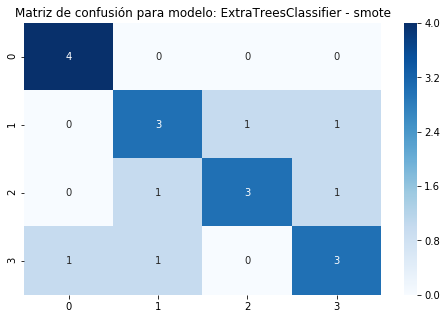

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.60      0.60      0.60         5
     IUGR_PE       0.75      0.60      0.67         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.68        19
   macro avg       0.69      0.70      0.69        19
weighted avg       0.68      0.68      0.68        19



In [758]:
modelo=best_models.iloc[0]['modelo']
test_modelo(modelo, best_models.index[0],X_sm, y_sm, X_test, y_test, evaluacion)

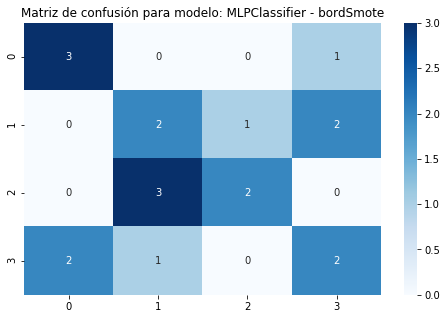

              precision    recall  f1-score   support

     Control       0.60      0.75      0.67         4
        IUGR       0.33      0.40      0.36         5
     IUGR_PE       0.67      0.40      0.50         5
          PE       0.40      0.40      0.40         5

    accuracy                           0.47        19
   macro avg       0.50      0.49      0.48        19
weighted avg       0.49      0.47      0.47        19



In [762]:
modelo=best_models.iloc[1]['modelo']
test_modelo(modelo, best_models.index[1],X_bsm, y_bsm, X_test, y_test, evaluacion)

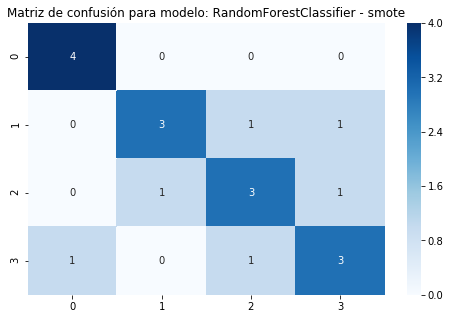

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.75      0.60      0.67         5
     IUGR_PE       0.60      0.60      0.60         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.68        19
   macro avg       0.69      0.70      0.69        19
weighted avg       0.68      0.68      0.68        19



In [763]:
modelo=best_models.iloc[2]['modelo']
test_modelo(modelo, best_models.index[2],X_sm, y_sm, X_test, y_test, evaluacion)

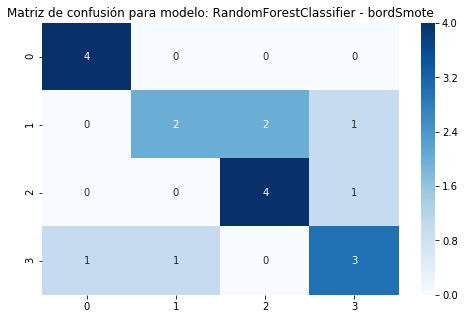

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.67      0.40      0.50         5
     IUGR_PE       0.67      0.80      0.73         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.68        19
   macro avg       0.68      0.70      0.68        19
weighted avg       0.68      0.68      0.67        19



In [764]:
modelo=best_models.iloc[3]['modelo']
test_modelo(modelo, best_models.index[3],X_bsm, y_bsm, X_test, y_test, evaluacion)

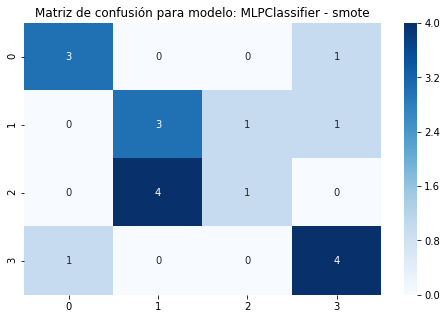

              precision    recall  f1-score   support

     Control       0.75      0.75      0.75         4
        IUGR       0.43      0.60      0.50         5
     IUGR_PE       0.50      0.20      0.29         5
          PE       0.67      0.80      0.73         5

    accuracy                           0.58        19
   macro avg       0.59      0.59      0.57        19
weighted avg       0.58      0.58      0.56        19



In [767]:
modelo=best_models2.iloc[4]['modelo']
test_modelo(modelo, best_models.index[4],X_sm, y_sm, X_test, y_test, evaluacion)

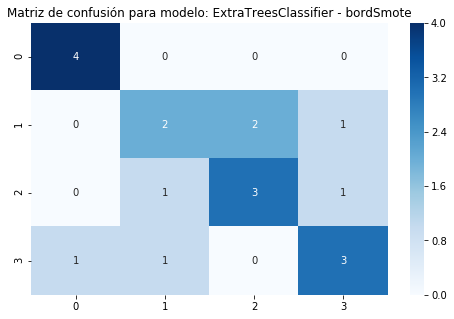

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.50      0.40      0.44         5
     IUGR_PE       0.60      0.60      0.60         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.63        19
   macro avg       0.62      0.65      0.63        19
weighted avg       0.62      0.63      0.62        19



In [768]:
modelo=best_models.iloc[5]['modelo']
test_modelo(modelo, best_models.index[5],X_bsm, y_bsm, X_test, y_test, evaluacion)

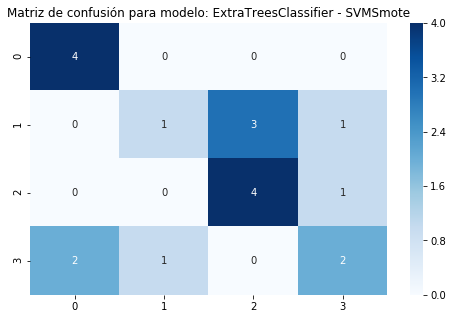

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       0.50      0.20      0.29         5
     IUGR_PE       0.57      0.80      0.67         5
          PE       0.50      0.40      0.44         5

    accuracy                           0.58        19
   macro avg       0.56      0.60      0.55        19
weighted avg       0.55      0.58      0.54        19



In [769]:
modelo=best_models.iloc[6]['modelo']
test_modelo(modelo, best_models.index[6],X_svsm, y_svsm, X_test, y_test, evaluacion)

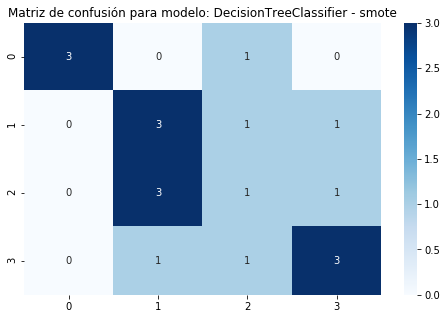

              precision    recall  f1-score   support

     Control       1.00      0.75      0.86         4
        IUGR       0.43      0.60      0.50         5
     IUGR_PE       0.25      0.20      0.22         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.53        19
   macro avg       0.57      0.54      0.54        19
weighted avg       0.55      0.53      0.53        19



In [770]:
modelo=best_models.iloc[7]['modelo']
test_modelo(modelo, best_models.index[7],X_sm, y_sm, X_test, y_test, evaluacion)

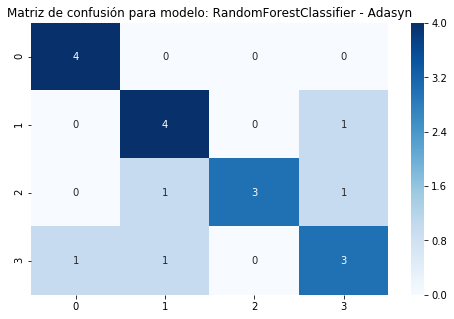

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.67      0.80      0.73         5
     IUGR_PE       1.00      0.60      0.75         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.74        19
   macro avg       0.77      0.75      0.74        19
weighted avg       0.76      0.74      0.73        19



In [771]:
modelo=best_models.iloc[8]['modelo']
test_modelo(modelo, best_models.index[8],X_ada, y_ada, X_test, y_test, evaluacion)

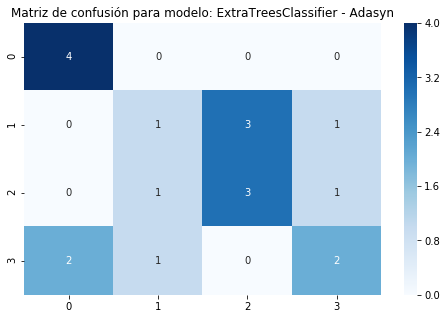

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       0.33      0.20      0.25         5
     IUGR_PE       0.50      0.60      0.55         5
          PE       0.50      0.40      0.44         5

    accuracy                           0.53        19
   macro avg       0.50      0.55      0.51        19
weighted avg       0.49      0.53      0.49        19



In [772]:
modelo=best_models.iloc[9]['modelo']
test_modelo(modelo, best_models.index[9],X_ada, y_ada, X_test, y_test, evaluacion)

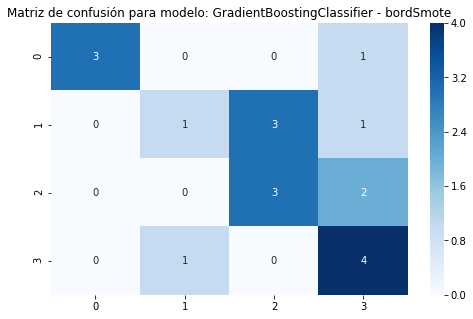

              precision    recall  f1-score   support

     Control       1.00      0.75      0.86         4
        IUGR       0.50      0.20      0.29         5
     IUGR_PE       0.50      0.60      0.55         5
          PE       0.50      0.80      0.62         5

    accuracy                           0.58        19
   macro avg       0.62      0.59      0.58        19
weighted avg       0.61      0.58      0.56        19



In [773]:
modelo=best_models.iloc[10]['modelo']
test_modelo(modelo, best_models.index[10],X_bsm, y_bsm, X_test, y_test, evaluacion)

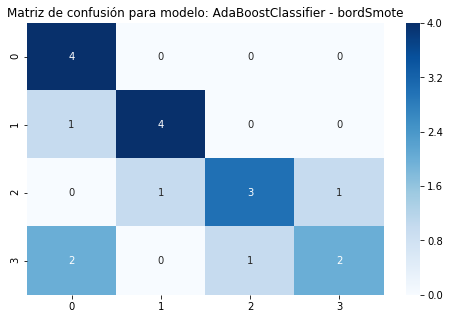

              precision    recall  f1-score   support

     Control       0.57      1.00      0.73         4
        IUGR       0.80      0.80      0.80         5
     IUGR_PE       0.75      0.60      0.67         5
          PE       0.67      0.40      0.50         5

    accuracy                           0.68        19
   macro avg       0.70      0.70      0.67        19
weighted avg       0.70      0.68      0.67        19



In [774]:
modelo=best_models.iloc[11]['modelo']
test_modelo(modelo, best_models.index[11],X_bsm, y_bsm, X_test, y_test, evaluacion)

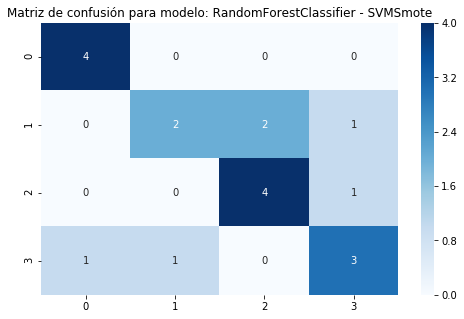

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.67      0.40      0.50         5
     IUGR_PE       0.67      0.80      0.73         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.68        19
   macro avg       0.68      0.70      0.68        19
weighted avg       0.68      0.68      0.67        19



In [775]:
modelo=best_models.iloc[12]['modelo']
test_modelo(modelo, best_models.index[12],X_svsm, y_svsm, X_test, y_test, evaluacion)

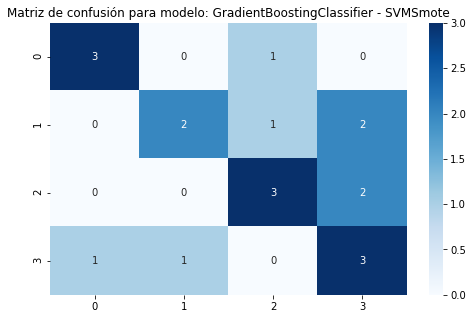

              precision    recall  f1-score   support

     Control       0.75      0.75      0.75         4
        IUGR       0.67      0.40      0.50         5
     IUGR_PE       0.60      0.60      0.60         5
          PE       0.43      0.60      0.50         5

    accuracy                           0.58        19
   macro avg       0.61      0.59      0.59        19
weighted avg       0.60      0.58      0.58        19



In [777]:
modelo=best_models.iloc[13]['modelo']
test_modelo(modelo, best_models.index[13],X_svsm, y_svsm, X_test, y_test, evaluacion)

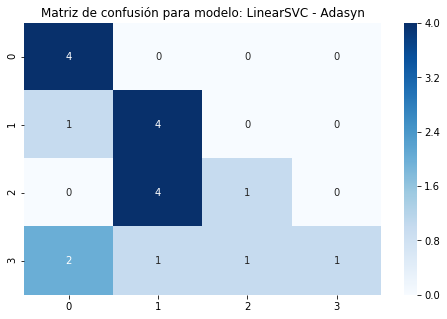

              precision    recall  f1-score   support

     Control       0.57      1.00      0.73         4
        IUGR       0.44      0.80      0.57         5
     IUGR_PE       0.50      0.20      0.29         5
          PE       1.00      0.20      0.33         5

    accuracy                           0.53        19
   macro avg       0.63      0.55      0.48        19
weighted avg       0.63      0.53      0.47        19



In [787]:
modelo=best_models.iloc[14]['modelo']
test_modelo(modelo, best_models.index[14],X_ada, y_ada, X_test, y_test, evaluacion)

In [788]:
evaluacion.sort_values(["Accuracy", "Recall"] , ascending= False)

,Accuracy,Precision,Recall,F1
RandomForestClassifier - Adasyn,0.736842,0.766667,0.7500,0.741540
ExtraTreesClassifier - smote,0.684211,0.687500,0.7000,0.688889
RandomForestClassifier - smote,0.684211,0.687500,0.7000,0.688889
RandomForestClassifier - bordSmote,0.684211,0.683333,0.7000,0.679040
RandomForestClassifier - SVMSmote,0.684211,0.683333,0.7000,0.679040
AdaBoostClassifier - bordSmote,0.684211,0.697024,0.7000,0.673485
ExtraTreesClassifier - bordSmote,0.631579,0.625000,0.6500,0.633333
ExtraTreesClassifier - SVMSmote,0.578947,0.559524,0.6000,0.549206
MLPClassifier - smote,0.578947,0.586310,0.5875,0.565747
GradientBoostingClassifier - SVMSmote,0.578947,0.611310,0.5875,0.587500


Tras evaluar los 15 mejores modelos, se determina que el modelo **RandomForestClassifier - Adasyn** es el mejor, con un accuracy del 0.736842, una precisión del 0.766667 y un recall de 0.7500. Teniendo en cuenta el tamaño del dataset de validación, consideramos que los resultados obtenidos son bastantes buenos.

#### Prueba de modelos con X_train e y_train sin oversampling

In [792]:
evaluacion2 =pd.DataFrame(columns=['Accuracy', 'Precision' ,"Recall","F1"])

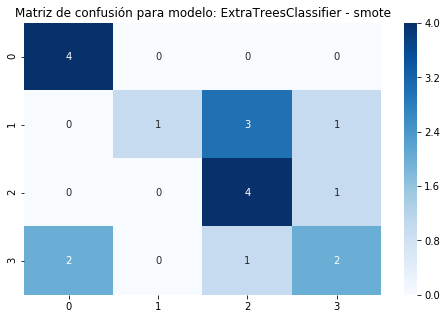

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       1.00      0.20      0.33         5
     IUGR_PE       0.50      0.80      0.62         5
          PE       0.50      0.40      0.44         5

    accuracy                           0.58        19
   macro avg       0.67      0.60      0.55        19
weighted avg       0.67      0.58      0.54        19



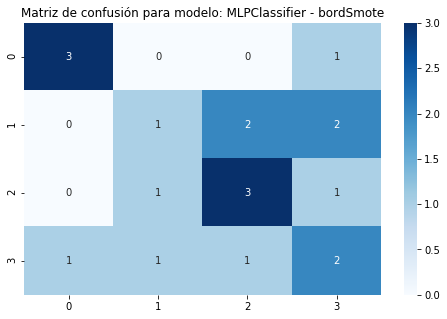

              precision    recall  f1-score   support

     Control       0.75      0.75      0.75         4
        IUGR       0.33      0.20      0.25         5
     IUGR_PE       0.50      0.60      0.55         5
          PE       0.33      0.40      0.36         5

    accuracy                           0.47        19
   macro avg       0.48      0.49      0.48        19
weighted avg       0.46      0.47      0.46        19



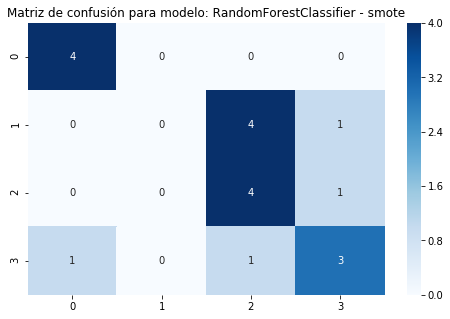

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.00      0.00      0.00         5
     IUGR_PE       0.44      0.80      0.57         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.58        19
   macro avg       0.46      0.60      0.52        19
weighted avg       0.44      0.58      0.50        19



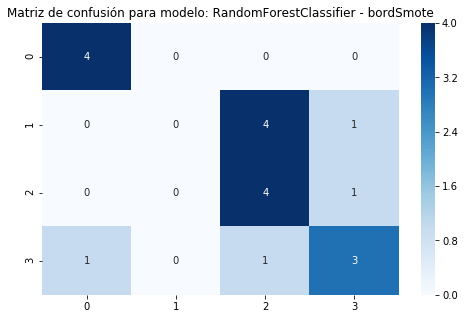

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.00      0.00      0.00         5
     IUGR_PE       0.44      0.80      0.57         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.58        19
   macro avg       0.46      0.60      0.52        19
weighted avg       0.44      0.58      0.50        19



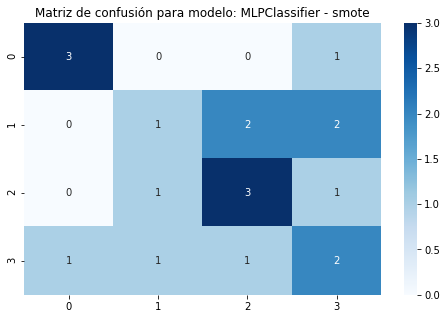

              precision    recall  f1-score   support

     Control       0.75      0.75      0.75         4
        IUGR       0.33      0.20      0.25         5
     IUGR_PE       0.50      0.60      0.55         5
          PE       0.33      0.40      0.36         5

    accuracy                           0.47        19
   macro avg       0.48      0.49      0.48        19
weighted avg       0.46      0.47      0.46        19



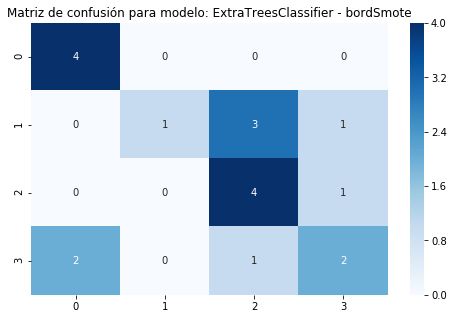

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       1.00      0.20      0.33         5
     IUGR_PE       0.50      0.80      0.62         5
          PE       0.50      0.40      0.44         5

    accuracy                           0.58        19
   macro avg       0.67      0.60      0.55        19
weighted avg       0.67      0.58      0.54        19



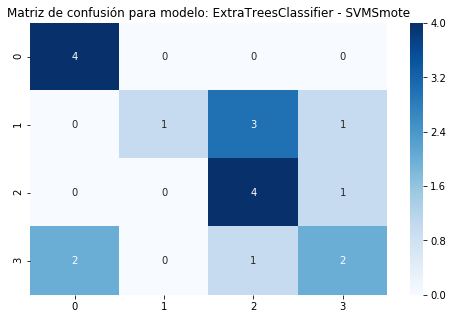

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       1.00      0.20      0.33         5
     IUGR_PE       0.50      0.80      0.62         5
          PE       0.50      0.40      0.44         5

    accuracy                           0.58        19
   macro avg       0.67      0.60      0.55        19
weighted avg       0.67      0.58      0.54        19



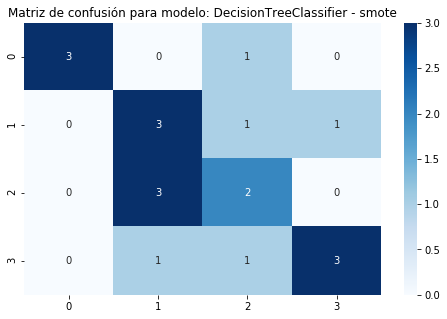

              precision    recall  f1-score   support

     Control       1.00      0.75      0.86         4
        IUGR       0.43      0.60      0.50         5
     IUGR_PE       0.40      0.40      0.40         5
          PE       0.75      0.60      0.67         5

    accuracy                           0.58        19
   macro avg       0.64      0.59      0.61        19
weighted avg       0.63      0.58      0.59        19



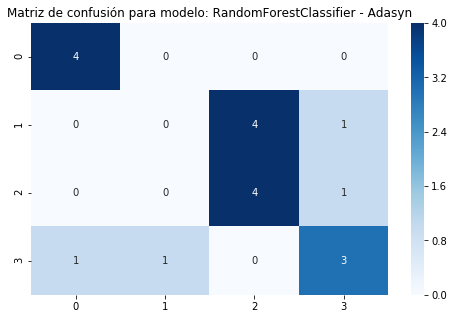

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.00      0.00      0.00         5
     IUGR_PE       0.50      0.80      0.62         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.58        19
   macro avg       0.47      0.60      0.53        19
weighted avg       0.46      0.58      0.51        19



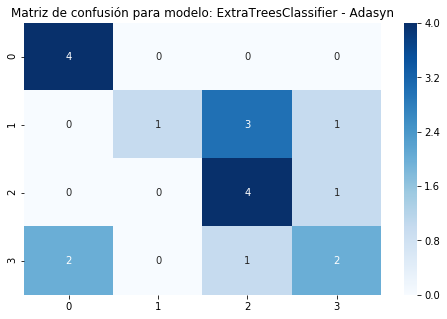

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       1.00      0.20      0.33         5
     IUGR_PE       0.50      0.80      0.62         5
          PE       0.50      0.40      0.44         5

    accuracy                           0.58        19
   macro avg       0.67      0.60      0.55        19
weighted avg       0.67      0.58      0.54        19



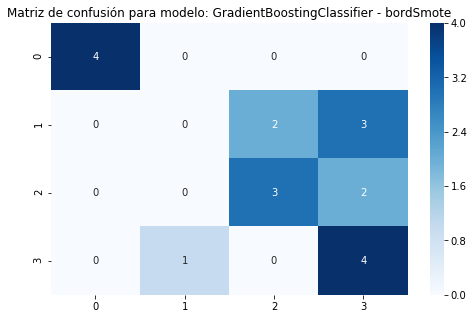

              precision    recall  f1-score   support

     Control       1.00      1.00      1.00         4
        IUGR       0.00      0.00      0.00         5
     IUGR_PE       0.60      0.60      0.60         5
          PE       0.44      0.80      0.57         5

    accuracy                           0.58        19
   macro avg       0.51      0.60      0.54        19
weighted avg       0.49      0.58      0.52        19



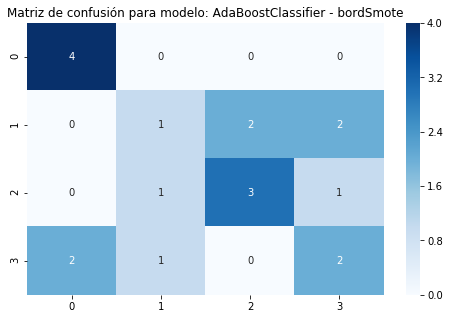

              precision    recall  f1-score   support

     Control       0.67      1.00      0.80         4
        IUGR       0.33      0.20      0.25         5
     IUGR_PE       0.60      0.60      0.60         5
          PE       0.40      0.40      0.40         5

    accuracy                           0.53        19
   macro avg       0.50      0.55      0.51        19
weighted avg       0.49      0.53      0.50        19



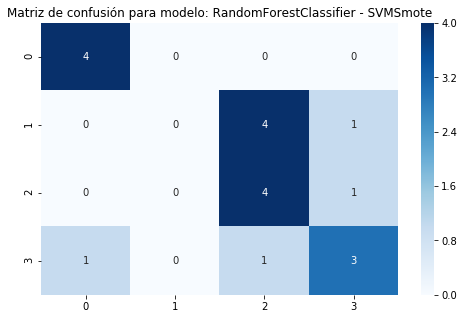

              precision    recall  f1-score   support

     Control       0.80      1.00      0.89         4
        IUGR       0.00      0.00      0.00         5
     IUGR_PE       0.44      0.80      0.57         5
          PE       0.60      0.60      0.60         5

    accuracy                           0.58        19
   macro avg       0.46      0.60      0.52        19
weighted avg       0.44      0.58      0.50        19



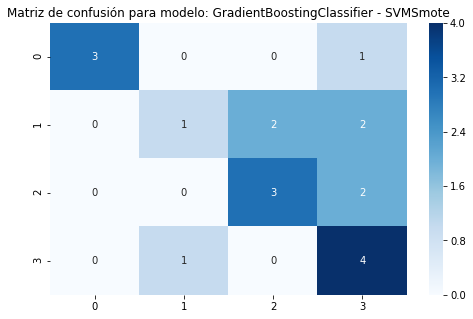

              precision    recall  f1-score   support

     Control       1.00      0.75      0.86         4
        IUGR       0.50      0.20      0.29         5
     IUGR_PE       0.60      0.60      0.60         5
          PE       0.44      0.80      0.57         5

    accuracy                           0.58        19
   macro avg       0.64      0.59      0.58        19
weighted avg       0.62      0.58      0.56        19



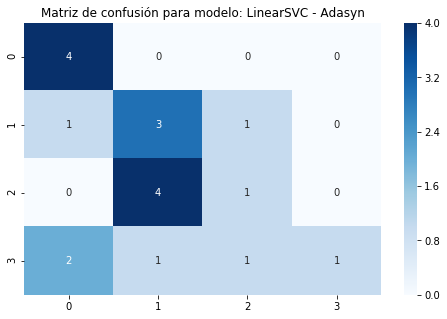

              precision    recall  f1-score   support

     Control       0.57      1.00      0.73         4
        IUGR       0.38      0.60      0.46         5
     IUGR_PE       0.33      0.20      0.25         5
          PE       1.00      0.20      0.33         5

    accuracy                           0.47        19
   macro avg       0.57      0.50      0.44        19
weighted avg       0.57      0.47      0.43        19



In [793]:
for i in range (15):
    modelo=best_models.iloc[i]['modelo']
    test_modelo(modelo, best_models.index[i],X_train, y_train, X_test, y_test, evaluacion2)
    

In [795]:
evaluacion2.sort_values(["Accuracy", "Recall"] , ascending= False)

,Accuracy,Precision,Recall,F1
GradientBoostingClassifier - bordSmote,0.578947,0.511111,0.6000,0.542857
ExtraTreesClassifier - smote,0.578947,0.666667,0.6000,0.548291
RandomForestClassifier - smote,0.578947,0.461111,0.6000,0.515079
RandomForestClassifier - bordSmote,0.578947,0.461111,0.6000,0.515079
ExtraTreesClassifier - bordSmote,0.578947,0.666667,0.6000,0.548291
ExtraTreesClassifier - SVMSmote,0.578947,0.666667,0.6000,0.548291
RandomForestClassifier - Adasyn,0.578947,0.475000,0.6000,0.526068
ExtraTreesClassifier - Adasyn,0.578947,0.666667,0.6000,0.548291
RandomForestClassifier - SVMSmote,0.578947,0.461111,0.6000,0.515079
DecisionTreeClassifier - smote,0.578947,0.644643,0.5875,0.605952


Con las técnicas de oversampling se ha conseguido una gran mejora


In [800]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 58 to 42
Data columns (total 18 columns):
age               19 non-null float64
weight            19 non-null float64
height            19 non-null float64
BMI               19 non-null float64
R-RI              19 non-null float64
R-PI              19 non-null float64
R-PSV             19 non-null float64
L-RI              19 non-null float64
L-PI              19 non-null float64
L-PSV             19 non-null float64
meanRI            19 non-null float64
meanPI            19 non-null float64
meanPSV           19 non-null float64
bilateralNotch    19 non-null float64
parity            19 non-null float64
S-Flt1            19 non-null float64
S-PLGF            19 non-null float64
sFLT/PLGF         19 non-null float64
dtypes: float64(18)
memory usage: 2.8 KB
